[INFO] compiling model...
[INFO] training network...
Epoch 1/15
165/165 [==============================] - 8s 39ms/step - loss: 0.7816 - accuracy: 0.7480 - val_loss: 0.6278 - val_accuracy: 0.6707
Epoch 2/15
165/165 [==============================] - 4s 24ms/step - loss: 0.5850 - accuracy: 0.8152 - val_loss: 0.4832 - val_accuracy: 0.7755
Epoch 3/15
165/165 [==============================] - 4s 24ms/step - loss: 0.5433 - accuracy: 0.8307 - val_loss: 0.3595 - val_accuracy: 0.8462
Epoch 4/15
165/165 [==============================] - 6s 39ms/step - loss: 0.5152 - accuracy: 0.8455 - val_loss: 0.4494 - val_accuracy: 0.7866
Epoch 5/15
165/165 [==============================] - 4s 27ms/step - loss: 0.5000 - accuracy: 0.8484 - val_loss: 0.3444 - val_accuracy: 0.8496
Epoch 6/15
165/165 [==============================] - 4s 26ms/step - loss: 0.4943 - accuracy: 0.8546 - val_loss: 0.3610 - val_accuracy: 0.8420
Epoch 7/15
165/165 [==============================] - 6s 34ms/step - loss: 0.4721 - accur

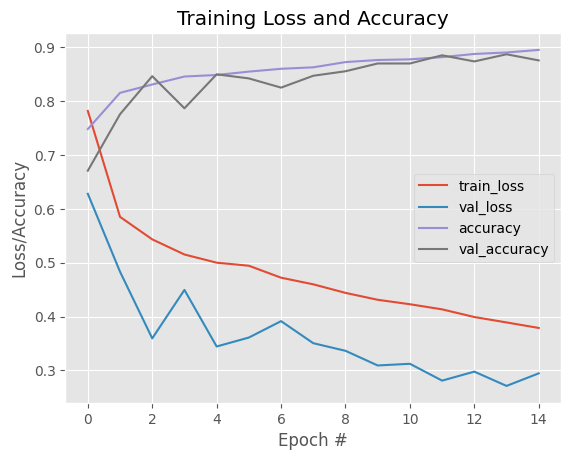

In [ ]:
#import package
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from imutils import paths
import imutils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

pathDataset = "/content/drive/MyDrive/Visi Komputer/SMILEsmileD-master/SMILEs"


# Membuat list data dan labels
data = []
labels = []

# loop untuk input gambar
for imagePath in sorted(list(paths.list_images(pathDataset))):
  #preprocessing menjadi 28 x 28 x 1
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=28) # 28 x 28 x 1
    image = img_to_array(image)
    data.append(image)

    # ekstrak the class label from the image path dan update list label
    label = imagePath.split(os.path.sep)[-3]
    label = 'smiling' if label == 'positives' else 'not_smiling'
    labels.append(label)

# Mengubah range menjadi 0 - 1
data = np.array(data, dtype='float') / 255.0 # 0 to 255
labels = np.array(labels)

# Convert label dari int ke vector
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

# Membuat weight class

classTotals = labels.sum(axis=0)
classWeight = dict()


for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

# Partisi Data menjadi 80% untuk training dan 20 % untuk testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# Membuat model CNN LeNet

print('[INFO] compiling model...')

def lenet_model(input_shape=(28, 28, 1), num_classes=2):
    model = Sequential()

    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model
# Train model
print('[INFO] training network...')
model = lenet_model()
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

H = model.fit(trainX, trainY, validation_data=(testX, testY), class_weight=classWeight, batch_size=64, epochs=15, verbose=1)

# Evaluasi
print('[INFO] evaluating network...')
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))


plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 15), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 15), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 15), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, 15), H.history['val_accuracy'], label='val_accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()
